# Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

> [Downlaod dataset here](recent-grads.csv)

---
#### Import needed modules and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

recent_grads = pd.read_csv("recent-grads.csv")

---
#### Show row sample

In [2]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Major_category                    Engineering
Total                                    2339
Sample_size                                36
Men                                      2057
Women                                     282
ShareWomen                           0.120564
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

---
#### Summary Statistics

In [3]:
recent_grads.describe()

/Users/iHijazi/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,NaN,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,NaN,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,NaN,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


---
#### Cleaning the data (from none values only, as the dataset is clean already)

In [4]:
recent_grads.dropna(inplace=True)

---
### Questions & Analysis

* Q: Do students in more popular majors make more money?

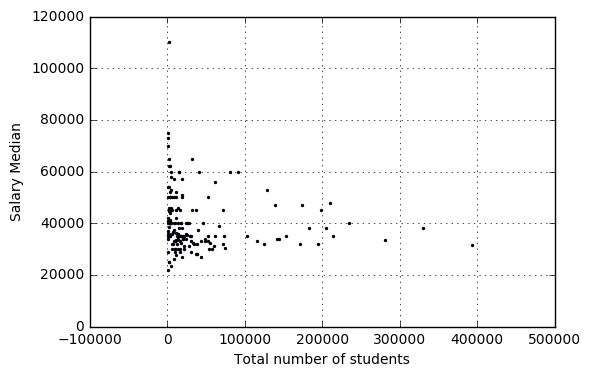

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=recent_grads["Total"],y=recent_grads["Median"],s=2)

ax1.set_xlabel("Total number of students")
ax1.set_ylabel("Salary Median")
ax1.grid()

plt.show()

Let's do more analytics to supplement our analysis

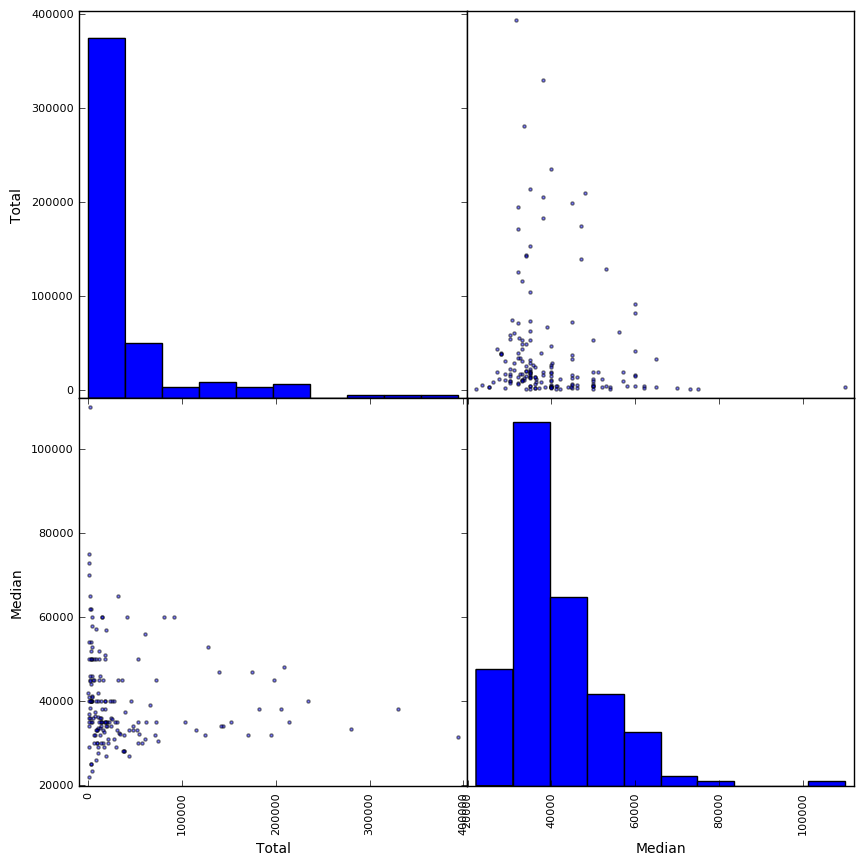

In [6]:
scatter_matrix(recent_grads[['Total', 'Median']], figsize=(10,10))

plt.show()

---
* Q: Do students that majored in subjects that were majority female make more money?

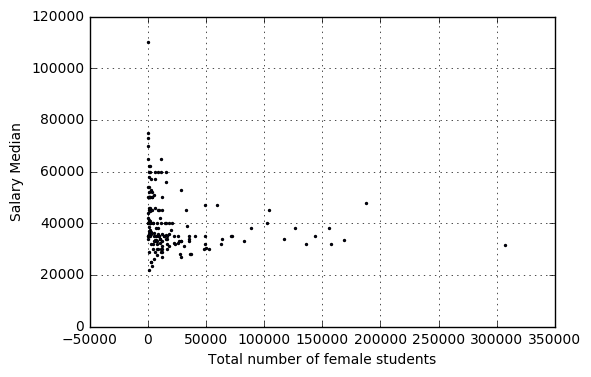

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=recent_grads["Women"],y=recent_grads["Median"],s=2)

ax1.set_xlabel("Total number of female students")
ax1.set_ylabel("Salary Median")
ax1.grid()

plt.show()

---
* Q: Is there any link between the number of full-time employees and median salary?

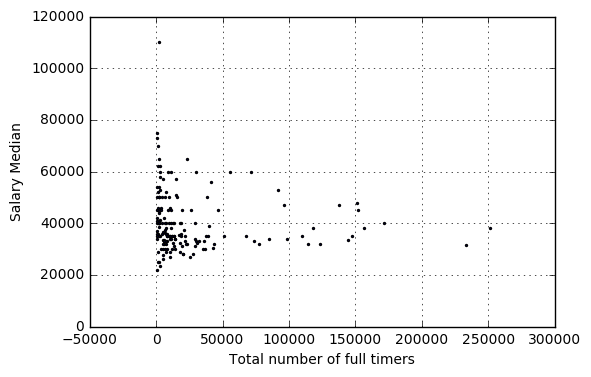

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=recent_grads["Full_time"],y=recent_grads["Median"],s=2)

ax1.set_xlabel("Total number of full timers")
ax1.set_ylabel("Salary Median")
ax1.grid()

plt.show()

---
* Q: How many majors are predominantly male? Predominantly female?

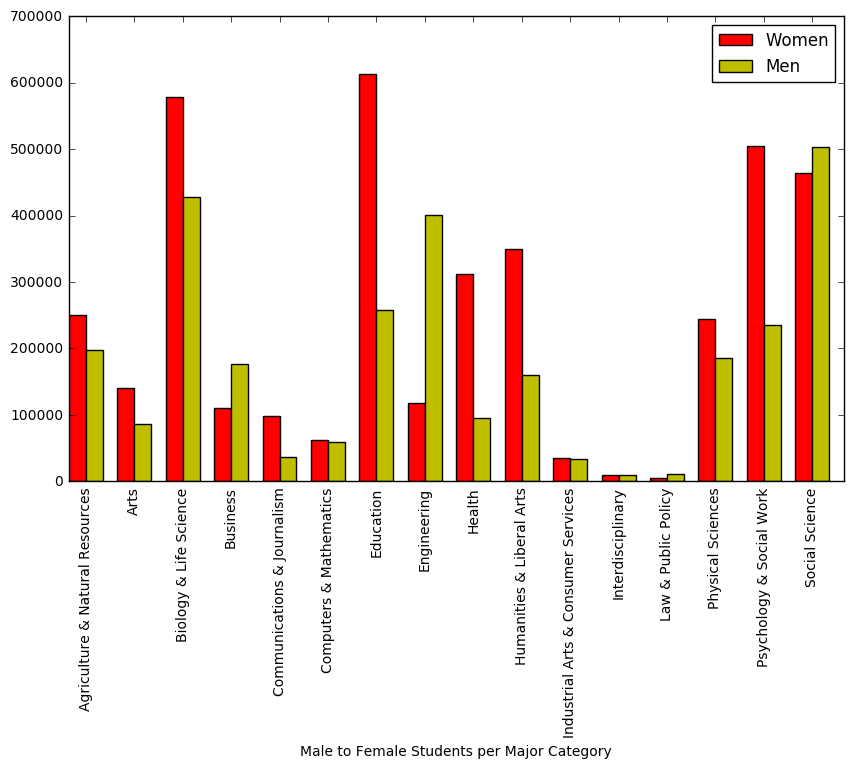

In [9]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

women_sums = recent_grads[["Major_category","Women"]].groupby("Major_category").agg(sum)
men_sums = recent_grads[["Major_category","Men"]].groupby("Major_category").agg(sum)

N = 16
width = 0.35

ind = np.arange(N)

ax1 = ax.bar(ind,women_sums.values,width,color='r')
ax2 = ax.bar(ind + width ,men_sums.values,width,color='y')

ax.set_xticks(ind + width)
ax.set_xticklabels(women_sums.index,rotation=90)

ax.legend((ax1[0], ax2[0]), ('Women', 'Men'))

plt.xlabel("Male to Female Students per Major Category")

plt.show()

---
* Q: What's the most common median salary range?

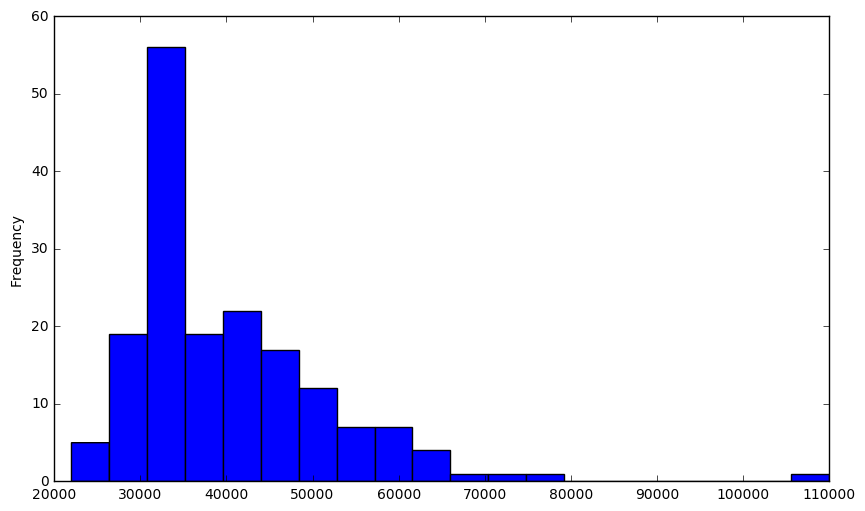

In [10]:
fig = plt.figure(figsize=(10,6))

recent_grads["Median"].plot.hist(bins=20)

plt.show()

---
* Q: Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns

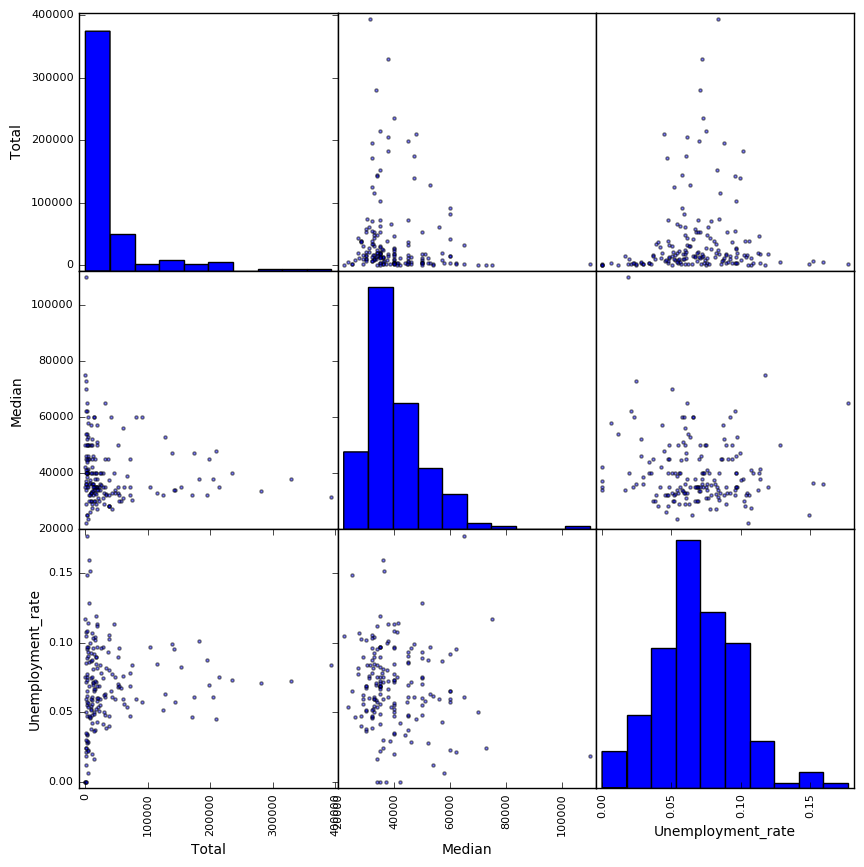

In [11]:
scatter_matrix(recent_grads[['Total', 'Median','Unemployment_rate']], figsize=(10,10))

plt.show()

---
* Q: Which category of majors have the most students?

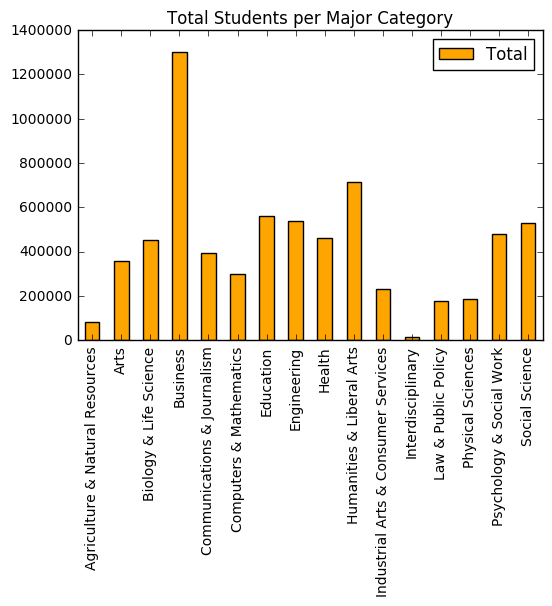

In [12]:
total_students = recent_grads[["Major_category","Total"]].groupby("Major_category").agg(sum)

total_students.plot(kind="bar",color='orange', title="Total Students per Major Category")

plt.xlabel("")

plt.show()

---
* Q: Use bar plots to compare the percentages of women (ShareWomen) from the 10 highest paying majors and from the 10 lowest paying majors.

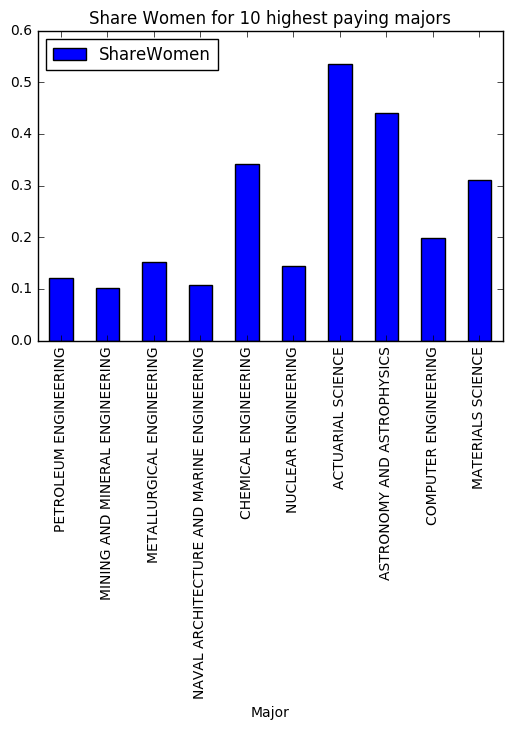

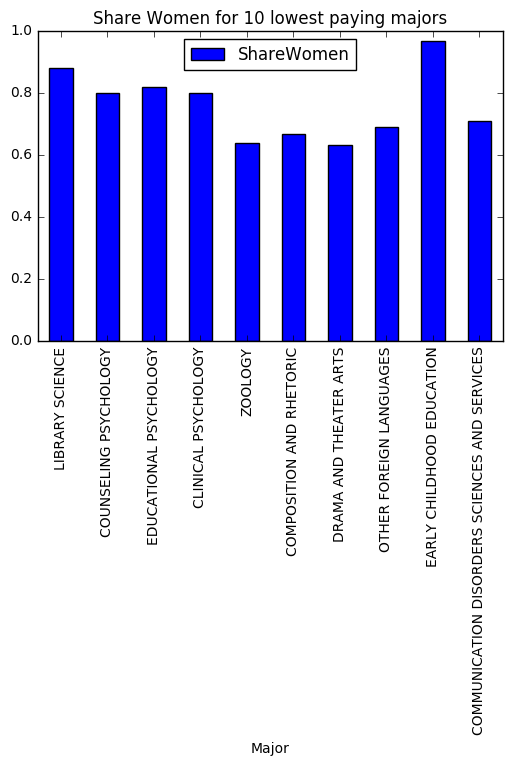

In [13]:
lowest_10 = recent_grads.sort_values("Median",ascending=False)[:10]
highest_10 = recent_grads.sort_values("Median",ascending=True)[:10]

lowest_10.plot(kind="bar",x="Major",y="ShareWomen",title="Share Women for 10 highest paying majors")
plt.show()

highest_10.plot(kind="bar",x="Major",y="ShareWomen",title="Share Women for 10 lowest paying majors")
plt.show()

---
* Q: Use bar plots to compare the unemployment rate (Unemployment_rate) from the 10 highest paying majors and from the 10 lowest paying majors

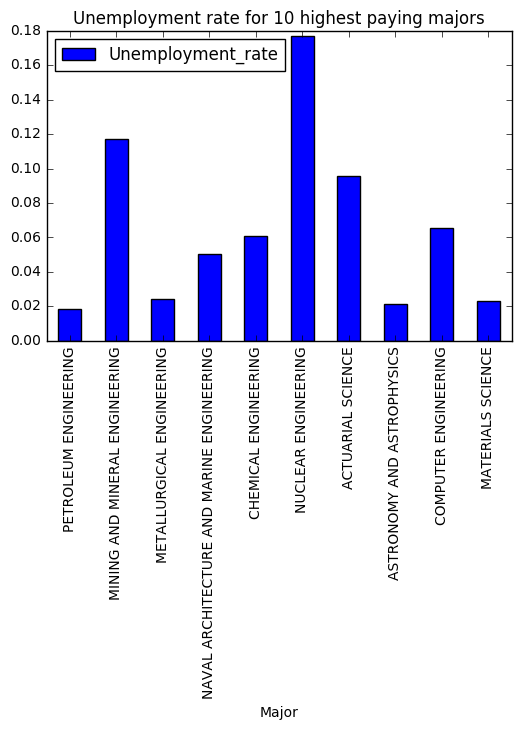

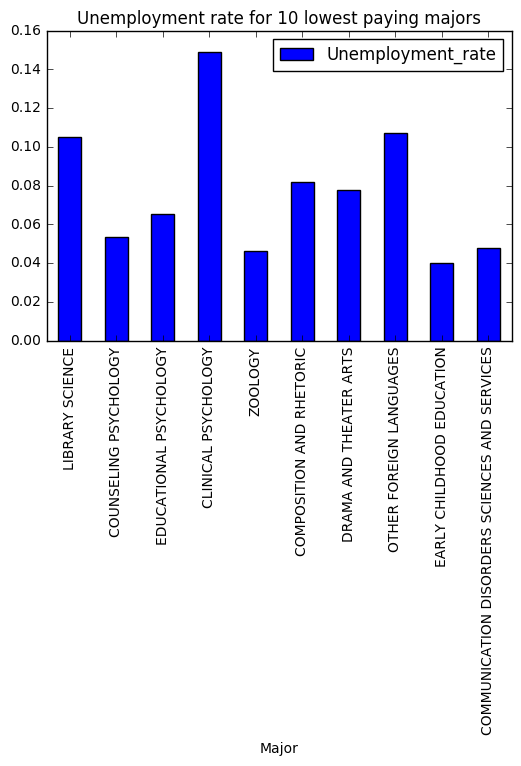

In [14]:
lowest_10.plot(kind="bar",x="Major",y="Unemployment_rate",title="Unemployment rate for 10 highest paying majors")
plt.show()

highest_10.plot(kind="bar",x="Major",y="Unemployment_rate",title="Unemployment rate for 10 lowest paying majors")
plt.show()

---
* Q: Use a grouped bar plot to compare the number of men with the number of women in each category of majors

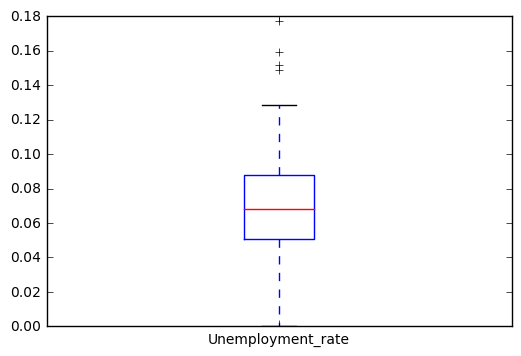

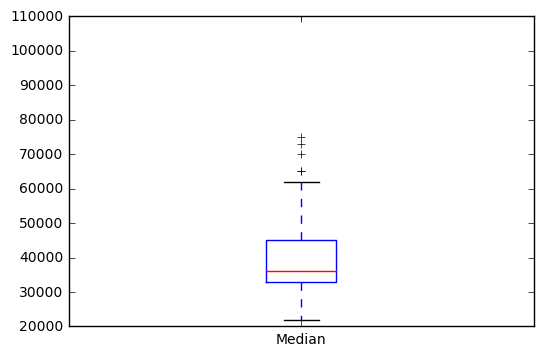

In [15]:
recent_grads[["Median","Unemployment_rate"]].plot(kind="box",x="Median")

plt.show()

recent_grads["Median"].plot(kind="box",x="Median")

plt.show()

---
* Q: Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

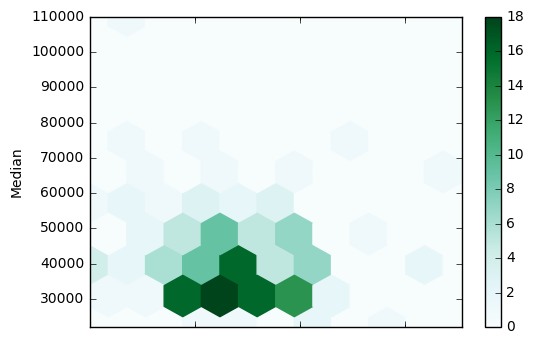

In [16]:
recent_grads.plot(kind="hexbin",x="Unemployment_rate",y="Median",gridsize=10)

plt.show()

---
---
### That's it!

Prepared by Issam Hijazi

https://ae.linkedin.com/in/ihijazi

@iHijazi